### Parts of Feature Engineering -

* 1. Feature Transformation-
    * 1.1 Handling missing values
    * 1.2 Converting the categorical columns into numerical columns
    * 1.3 Feature scaling
    * 1.4 Outlier detection
* 2. Feature Construction - creating a new columns by combining existing columns for use
* 3. Feature Selection - taking only those features that are helpful (needed) for the dataset
* 4. Feature Extraction - creating completely new features from the existing features (columns)

### Feature Scaling -  

#### Types of Feature Scaling - 
* There are only two types of Feature Scaling - 
* 1. Standardization
* 2. Normalization

#### Standardization (one way to perform feature scaling)

In [1]:
### Standardization is also known as 'Z-score normalization'

* In standardization, we divide each value of a column (xi) to its mean.
* The new column that is obtained has mean equal to zero and std dev equal to 1.
* This is only known as Standardization
* Here, Scaling is Std dev.
* Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out. A standard deviation close to zero indicates that data points are close to the mean, whereas a high or low standard deviation indicates data points are respectively above or below the mean.
* A high standard deviation shows that the data is widely spread (less reliable) and a low standard deviation shows that the data are clustered closely around the mean (more reliable).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head(5)

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [12]:
df1 = df.iloc[:,2:]

In [13]:
df1.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

In [14]:
df1.sample(5)

Age  EstimatedSalary  Purchased
191   19            26000          0
31    27           137000          1
373   59           130000          1
0     19            19000          0
243   56           104000          1

In [20]:
X = df1.drop(['Purchased'], axis=1)

In [21]:
X.head(2)

Age  EstimatedSalary
0   19            19000
1   35            20000

In [23]:
y = df1['Purchased']

In [24]:
y.head(2)

0    0
1    0
Name: Purchased, dtype: int64

* here we have splitted the target column from the input columns

### Performing Train_Test_Split

In [25]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=10, stratify=y)

* stratify is used to divide the examples in equal proportion of the original dataset from y
* random_state is used to get the same output and not in a random manner everytime we run the testcase
* train_size means that we are giving 70% of the dataset to the training data
* test_size means that we are giving 30% of the data set to the test data
* we can use either of 'train_size' or 'test_size' in the above code.

In [27]:
X_train.shape

(280, 2)

In [28]:
X_test.shape

(120, 2)

In [29]:
df1.shape

(400, 3)

In [30]:
y_train.shape

(280,)

In [31]:
y_test.shape

(120,)

### Standard Scaler -  

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [36]:
scaler.fit(X_train)
## here 'scaler' object will fit all the columns and rows in the desired range of the 'X_train' dataset
## here it stores the values of mean and std dev

StandardScaler()

In [37]:
scaler.mean_

array([3.77535714e+01, 7.04071429e+04])

* the first mean is of the Age and the second mean is of the Salary which it calculated through the fit method written above

In [38]:
## transforming train and test sets - 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [43]:
X_train_scaled

Age  EstimatedSalary
0    1.191528        -0.784342
1   -0.948983        -0.784342
2    0.510456         1.740318
3   -0.851687         2.304654
4    0.023976        -0.338814
..        ...              ...
275  0.218568        -0.279410
276  0.413160         0.136417
277 -0.559799        -1.556591
278 -0.948983        -0.992255
279  0.802344        -1.259572

[280 rows x 2 columns]

In [45]:
X_train_scaled.describe()

Age  EstimatedSalary
count  2.800000e+02     2.800000e+02
mean   2.997602e-16     5.551115e-17
std    1.001791e+00     1.001791e+00
min   -1.921942e+00    -1.645697e+00
25%   -8.516868e-01    -7.546401e-01
50%   -7.331943e-02     1.760898e-02
75%    8.023439e-01     4.928392e-01
max    2.164487e+00     2.334356e+00

* this e-value can be replaced using 'np.round' function as shown below - 

In [47]:
np.round(X_train_scaled)

Age  EstimatedSalary
0    1.0             -1.0
1   -1.0             -1.0
2    1.0              2.0
3   -1.0              2.0
4    0.0             -0.0
..   ...              ...
275  0.0             -0.0
276  0.0              0.0
277 -1.0             -2.0
278 -1.0             -1.0
279  1.0             -1.0

[280 rows x 2 columns]

In [54]:
np.round(X_train_scaled.describe(), 1)
## 1 means upto how much decimal points you want the data to appear

Age  EstimatedSalary
count  280.0            280.0
mean     0.0              0.0
std      1.0              1.0
min     -1.9             -1.6
25%     -0.9             -0.8
50%     -0.1              0.0
75%      0.8              0.5
max      2.2              2.3

* here, it is important that the std dev is equal to 1 both for Age and Salary columns which means that we have performed the Standardization on these columns.

In [53]:
np.round(X_train.describe(), 2)

Age  EstimatedSalary
count  280.00           280.00
mean    37.75         70407.14
std     10.30         33728.18
min     18.00         15000.00
25%     29.00         45000.00
50%     37.00         71000.00
75%     46.00         87000.00
max     60.00        149000.00

### Effect of Scaling - 

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

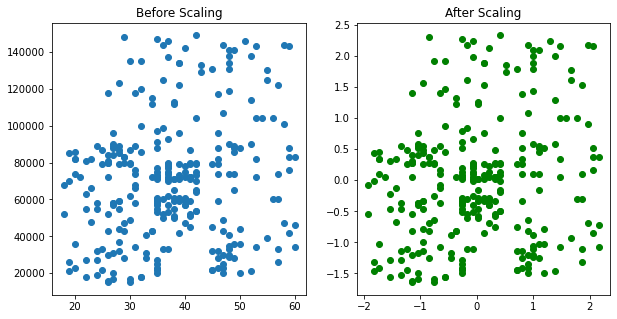

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (10,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = 'green')
ax2.set_title('After Scaling')
plt.show()

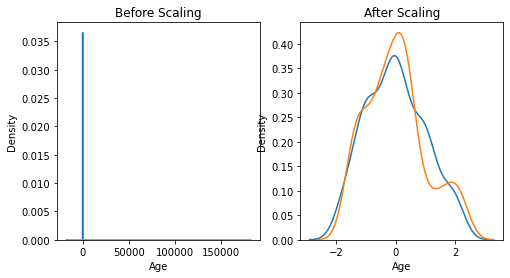

In [66]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (8,4))
sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)
ax1.set_title('Before Scaling')

sns.kdeplot(X_train_scaled['Age'], ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)
ax2.set_title('After Scaling')
plt.show()

### Comparison of Distributions - 

Text(0.5, 1.0, 'Age Distribution After Scaling')

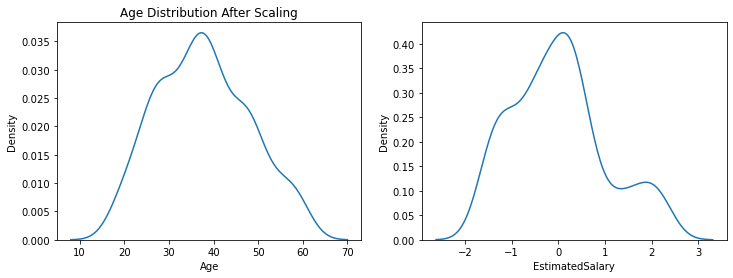

In [69]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (12,4))

ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax = ax1)

sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)
ax1.set_title('Age Distribution After Scaling')

#### Normalization - 

#### Basically there are 4 types of normalization techniques - 
* MinMax scaling (most commonly used)
* Mean Normalization
* Max Absolute
* Robust scaling

* Formula for Min-Max scaling is - 

xi' (transformed number) = (xi-min)/(xmax-xmin)
* here, xmax = highest number present in the column
* xmin = lowest number present in the column
* thus after calculation of each and every number present in the column the range of min-max scaler is (0,1)

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
winedata = pd.read_csv("wine_data.csv")

In [135]:
winedata.head(3)

1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29  5.64  1.04  3.92  \
0  1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
1  1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
2  1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   

   1065  
0  1050  
1  1185  
2  1480

In [136]:
winedata = pd.read_csv("wine_data.csv", names= ['Class Label', 'Alcohol', 'Malic acid'], usecols=[0,1,2])
winedata.head(3)

Class Label  Alcohol  Malic acid
0            1    14.23        1.71
1            1    13.20        1.78
2            1    13.16        2.36

In [137]:
winedata['Class Label'].value_counts(dropna=True)

2    71
1    59
3    48
Name: Class Label, dtype: int64

In [138]:
winedata['Alcohol'].value_counts()

13.05    6
12.37    6
12.08    5
12.29    4
12.42    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: Alcohol, Length: 126, dtype: int64

C:\Users\shivantripathi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


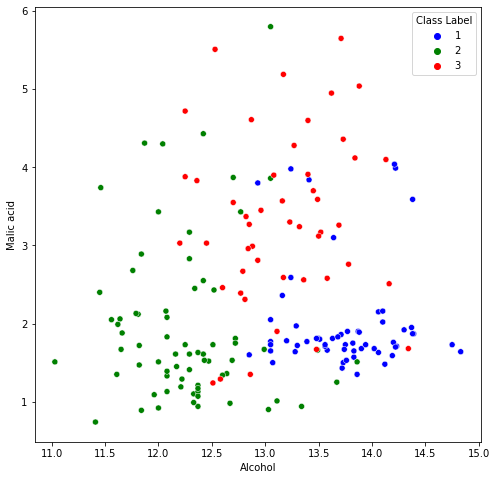

In [139]:
plt.figure(figsize=(8,8))
color_dict = {1: 'blue', 2: 'green', 3: 'red'}
sns.scatterplot(winedata['Alcohol'],winedata['Malic acid'],hue= df['Class Label'], palette=color_dict)
plt.show()

In [140]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [141]:
winedata.head(3)

Class Label  Alcohol  Malic acid
0            1    14.23        1.71
1            1    13.20        1.78
2            1    13.16        2.36

In [142]:
winedata.sample(4)

Class Label  Alcohol  Malic acid
29             1    14.02        1.68
121            2    11.56        2.05
55             1    13.56        1.73
72             2    13.49        1.66

In [143]:
winedata.isnull().sum()

Class Label    0
Alcohol        0
Malic acid     0
dtype: int64

In [144]:
winedata.drop_duplicates(inplace=True)

In [145]:
winedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class Label  178 non-null    int64  
 1   Alcohol      178 non-null    float64
 2   Malic acid   178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 5.6 KB


In [146]:
winedata.shape

(178, 3)

In [147]:
## splitting the data into training and test set with a ratio of 80-20

In [148]:
winedata.head(2)

Class Label  Alcohol  Malic acid
0            1    14.23        1.71
1            1    13.20        1.78

* here I am taking 'Malic acid' as the target variable

In [149]:
winedata1 = winedata.iloc[:,:2]
winedata1.head(2)

Class Label  Alcohol
0            1    14.23
1            1    13.20

In [150]:
X = winedata.drop(['Malic acid'], axis = 1)
X.head(2)

Class Label  Alcohol
0            1    14.23
1            1    13.20

In [151]:
y = winedata['Malic acid']
y.head(2)

0    1.71
1    1.78
Name: Malic acid, dtype: float64

In [165]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y, test_size=0.2, random_state=20)

In [168]:
X_train1.head(2)

Class Label  Alcohol
1             1    13.20
67            2    12.37

In [169]:
X_test1.head(2)

Class Label  Alcohol
111            2    12.52
177            3    14.13

In [171]:
y_test1.head(2)

111    2.43
177    4.10
Name: Malic acid, dtype: float64

In [172]:
X_train1.shape

(142, 2)

In [173]:
X_test1.shape

(36, 2)

In [174]:
y_train1.shape

(142,)

In [175]:
y_test1.shape

(36,)

### Min Max Scaler - 

In [160]:
minmaxscale = MinMaxScaler()

In [176]:
minmaxscale.fit(X_train1)

MinMaxScaler()

In [178]:
X_train_minmaxScaled = minmaxscale.transform(X_train1)
X_test_minmaxScaled = minmaxscale.transform(X_test1)

In [180]:
X_train_minmaxScaled = pd.DataFrame(X_train_minmaxScaled, columns=X_train1.columns)
X_test_minmaxScaled = pd.DataFrame(X_test_minmaxScaled, columns=X_test1.columns)

In [183]:
np.round(X_train_minmaxScaled.describe(), 1)

Class Label  Alcohol
count        142.0    142.0
mean           0.5      0.5
std            0.4      0.2
min            0.0      0.0
25%            0.0      0.4
50%            0.5      0.5
75%            1.0      0.7
max            1.0      1.0

* Here, we can see that as per the rule of min max scaler, after applying this method on the training and test datasets, the min value should be 0 and max value should 1.
* Thus, here in the above table it is verified that the min and max values are 0 and 1 respectively.
* The same can be seen the test data table as well as shown below.

In [182]:
np.round(X_test_minmaxScaled.describe(), 1)

Class Label  Alcohol
count         36.0     36.0
mean           0.5      0.5
std            0.4      0.2
min            0.0      0.1
25%            0.0      0.3
50%            0.5      0.5
75%            0.6      0.7
max            1.0      1.0

### Effect of Scaling - 

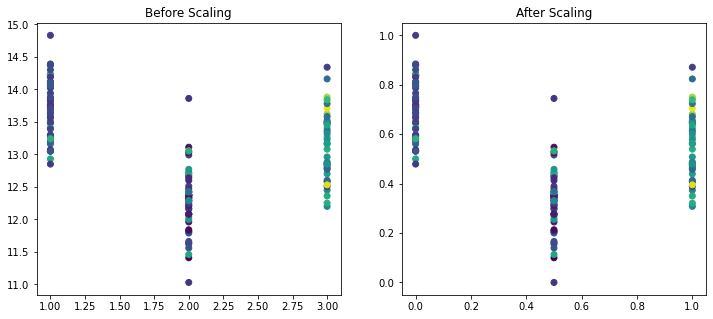

In [192]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (12,5))

ax1.scatter(X_train1['Class Label'], X_train1['Alcohol'], c=y_train1)
ax1.set_title('Before Scaling')

ax2.scatter(X_train_minmaxScaled['Class Label'], X_train_minmaxScaled['Alcohol'], c=y_train1)
ax2.set_title('After Scaling') 

plt.show()

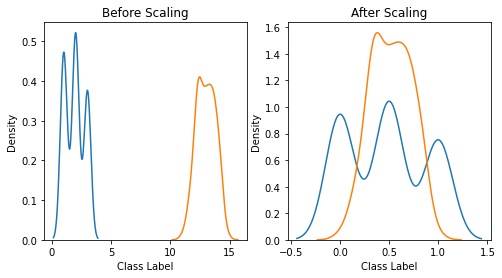

In [193]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (8,4))
sns.kdeplot(X_train1['Class Label'], ax = ax1)
sns.kdeplot(X_train1['Alcohol'], ax = ax1)
ax1.set_title('Before Scaling')

sns.kdeplot(X_train_minmaxScaled['Class Label'], ax = ax2)
sns.kdeplot(X_train_minmaxScaled['Alcohol'], ax = ax2)
ax2.set_title('After Scaling')
plt.show()

### Comparison of Distributions - 

Text(0.5, 1.0, 'Class Label Distribution After Scaling')

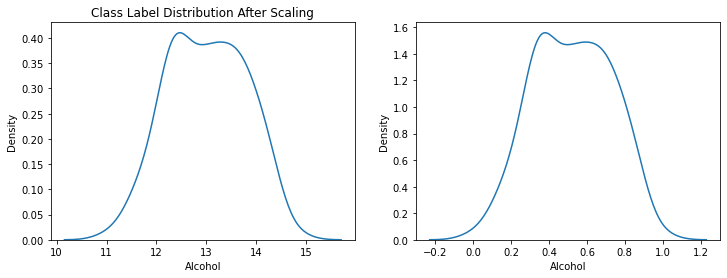

In [195]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (12,4))

ax1.set_title('Alcohol Before Scaling')
sns.kdeplot(X_train1['Alcohol'], ax = ax1)

sns.kdeplot(X_train_minmaxScaled['Alcohol'], ax = ax2)
ax1.set_title('Class Label Distribution After Scaling')

Text(0.5, 1.0, 'Class Label Distribution After Scaling')

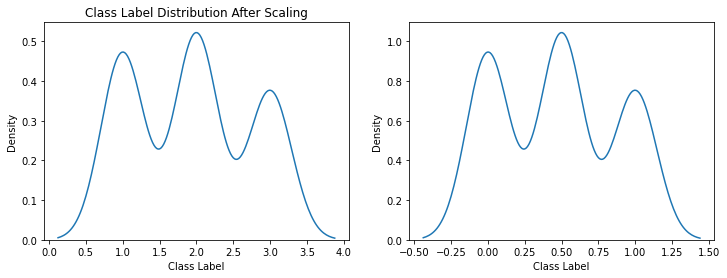

In [196]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (12,4))

ax1.set_title('Alcohol Before Scaling')
sns.kdeplot(X_train1['Class Label'], ax = ax1)

sns.kdeplot(X_train_minmaxScaled['Class Label'], ax = ax2)
ax1.set_title('Class Label Distribution After Scaling')

* no change when we check for each column individually as shown above, only the number range has change after applying min max scaler

* as min-max scaler compresses all the values in the range of (0,1) so the outliers are also compressed which is a disadvantage

### Mean Normalization - 

* mean normalization gives the values in the range of (-1,1)
* formula is: xi' = (xi-xmean)/(xmax-xmin)
* if the value is less than mean then we get the negative number
* if the value is greater than mean then we get the positive number
* it is used very less, infact there is no class created for it, we have to write the code by ourselves
* it is mainly used for the centered-data.

### MeanAbs Scaling - 

* xi' = xi/|xmax|
* class used in scikit learn is 'MaxAbsScaler'

### Robust Scaling - 

* xi' = (xi-median)/IQR where IQR = Q3-Q1
* IQR = Q#-Q1 (75th percentile value - 25th percentile value)
* class used is 'RobustScaler'
* it is robust to outliers - if the data has outliers then we should go for Robust Scaling

## Normalization vs Standardization - 

* Questions that we should ask before applying any of these - 
    * if feature scaling required? - this depends on the algorithm we use
    * if we are sure that we have to use scaling then - most of the problems are solved using Standardization
    * MinMaxScaler is used when we know the minimum and maximum quantity before hand
    * RobustScaler - when we have to deal with outliers.